In [110]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")

In [112]:
print(haberman.shape)

(306, 4)


In [113]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [114]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

# objective:
Here the objective is to predict whether a patient will survive after 5 years or not based upon the patient's age,year of treatment and the number of positive lymph nodes

In [115]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# The first 5 datapoints are printed here.

   1.First column shows the age of patients

   2.Second column shows the year each patient had undergone the surgery during 1958 and 1970

   3.Third column shows the number of numbers of tumors they found

   4.Fourth column shows the survival status of the patients.

      If the value is 1 - The patient survived 5 years or more

      If the value is 2 - The patient survived less than 5 years

In [116]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# age
   ##### . the age of the patients vary from 30 to 83 with a mean of 52
   ##### . 75% of the patients were almost 61
   

# year
##### . oldest patient had the surgery on 69 and the youngest was 58,with a mean of 62
##### . 75% of the patients had the surgery between 58 to 66
# nodes
##### . more than 25% of the patients have no positive lymph nodes and 75% of the paatients have less than 5 nodes
##### . 52 positive lymph nodes was found in a particular patient
# status
##### . more than 50% of the patients survived 5 years or more

In [117]:
haberman["nodes"].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

# 2-D scatter plot

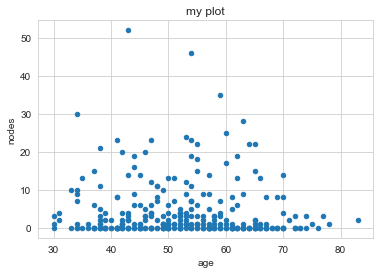

In [118]:
haberman.plot(kind = 'scatter',x = 'age',y = 'nodes')
plt.title("my plot")
plt.show()


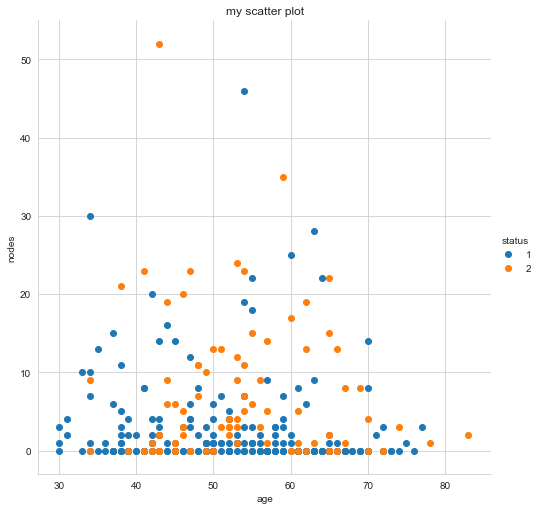

In [119]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue = 'status',size = 7)\
   .map(plt.scatter,'age','nodes')\
   .add_legend()
plt.title("my scatter plot")
plt.show()

#### most of the patients have 0 nodes
#### those have 0 nodes survived more than 5 years

# pair-plot

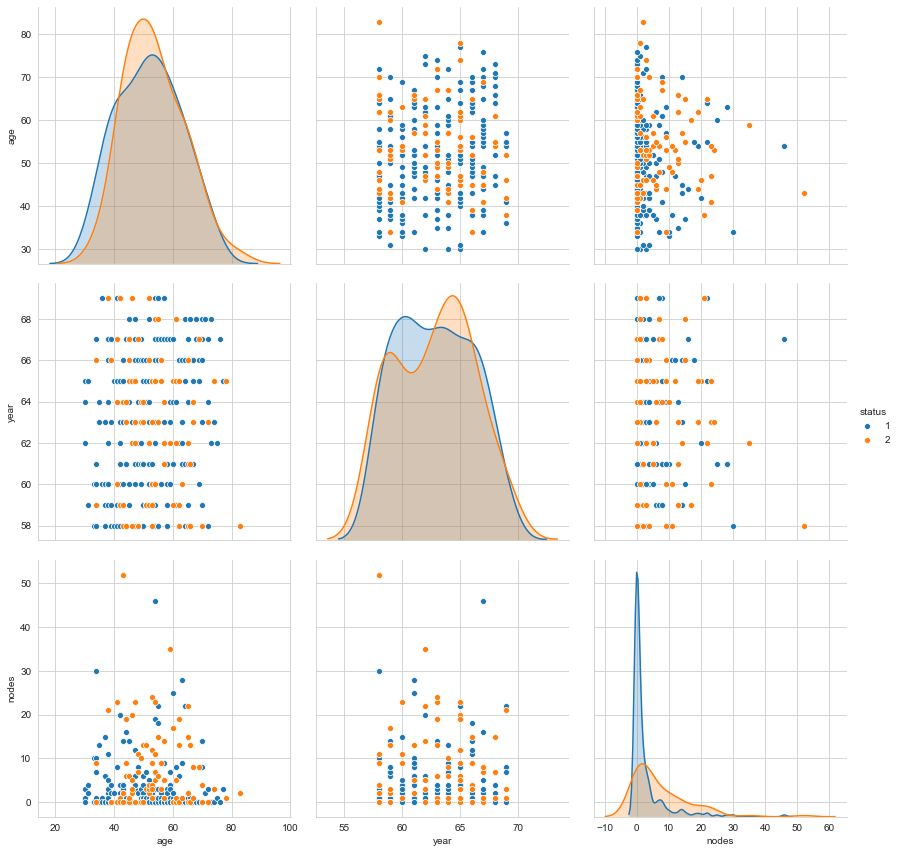

In [120]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status",vars = ['age', 'year', 'nodes'], size = 4)    
plt.show()

#### . Plot between nodes and age is very understanding. Most of the patient who survived have no positive lymph nodes.

# Histogram,PDF

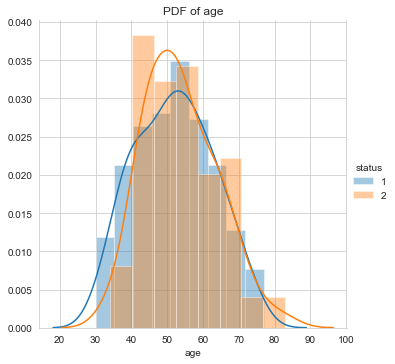

In [121]:
sns.FacetGrid(haberman,hue='status',size = 5)\
.map(sns.distplot,'age')\
.add_legend()
plt.title("PDF of age")
plt.show()

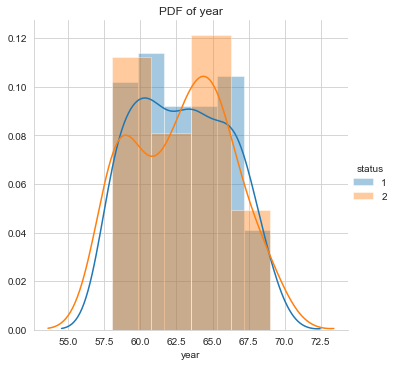

In [122]:
sns.FacetGrid(haberman,hue='status',size = 5)\
.map(sns.distplot,'year')\
.add_legend()
plt.title("PDF of year")
plt.show()

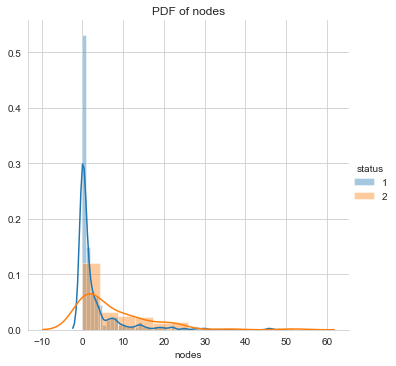

In [123]:
sns.FacetGrid(haberman,hue='status',size = 5)\
.map(sns.distplot,'nodes')\
.add_legend()
plt.title("PDF of nodes")
plt.show()

#### histogram nodes shows us that the patient who survived more than 5 years have no lymph nodes

# CDF

In [124]:
alive = haberman.loc[haberman["status"]==1]
dead = haberman.loc[haberman["status"]==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


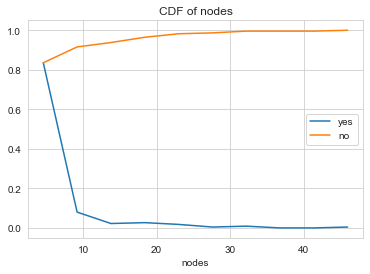

In [125]:

counts, bin_edges = np.histogram(alive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:], cdf,label='no')
plt.xlabel("nodes")
plt.title('CDF of nodes')
plt.legend()




plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


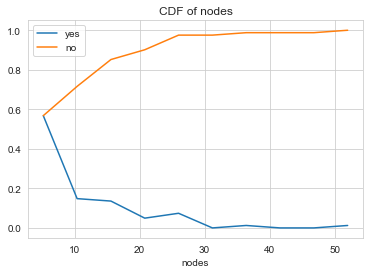

In [69]:
counts, bin_edges = np.histogram(dead['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:], cdf,label='no')
plt.xlabel("nodes")
plt.title('CDF of nodes')
plt.legend()




plt.show();

# Mean,Variance,Std-dev

In [126]:
print("Patients who survived for more than 5 years")
alive.describe()

Patients who survived for more than 5 years


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [127]:
print("Patients who survived less than 5 years")
dead.describe()

Patients who survived less than 5 years


,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Median,Percentile,Quantile,IQR,MAD

In [128]:
print('median:')
print(np.median(alive['nodes']))
print(np.median(dead['nodes']))
print('\n')

print('quantile:')
print(np.percentile(alive['nodes'],np.arange(0,100,25)))
print(np.percentile(dead['nodes'],np.arange(0,100,25)))
print('\n')

print('90th percentile:')
print(np.percentile(alive['nodes'],90))
print(np.percentile(dead['nodes'],90))
print('\n')

from statsmodels import robust
print('Median Absolute Deviation:')
print(robust.mad(alive['nodes']))
print(robust.mad(dead['nodes']))


median:
0.0
4.0


quantile:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


90th percentile:
8.0
20.0


Median Absolute Deviation:
0.0
5.930408874022408


# Box plot and Whiskers

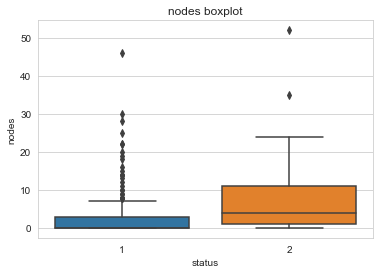

In [129]:
sns.boxplot(x='status',y='nodes',data = haberman)
plt.title("nodes boxplot")
plt.show()

#### patients with more nodes lived less than 5 years and patients with less nodes lived more than 5 years

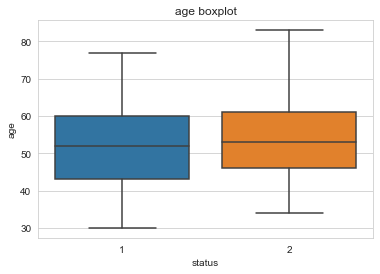

In [130]:
sns.boxplot(x='status',y='age',data=haberman)
plt.title("age boxplot")
plt.show()

#### . patients who survived more than 5 years aged between 40 to 60 years old
#### . patients who survived  less than 5 years aged between 45 to 62 years old

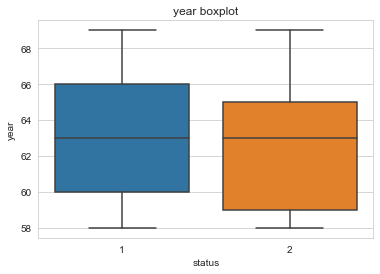

In [131]:
sns.boxplot(x='status',y='year',data=haberman)
plt.title("year boxplot")
plt.show()

#### . patients who survived more than 5 years had an operation between 1960 to 1966
#### . patients who survived less than 5 years had an operation between 1959 to 1965

# Violin plot

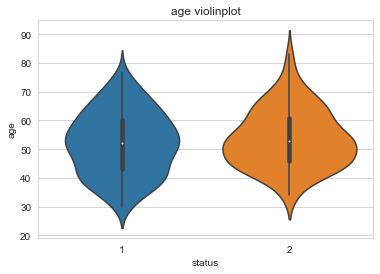

In [132]:
sns.violinplot(x='status',y='age',data=haberman,size=8)
plt.title("age violinplot")
plt.show()

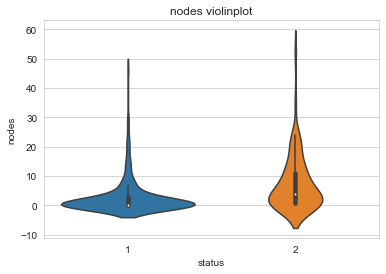

In [133]:
sns.violinplot(x='status',y='nodes',data=haberman,size=8)
plt.title("nodes violinplot")
plt.show()

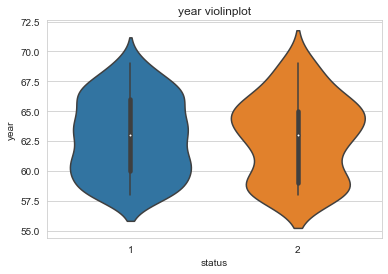

In [134]:
sns.violinplot(x='status',y='year',data=haberman,size=8)
plt.title("year violinplot")
plt.show()

### observations:

#### . 80% of the patients have less than or equal to 5 lymph survived more than 5years.

#### . Number of positive lymph nodes of the survivors is more from 0 to 5

# Multivariate Probability Density,contour plot 

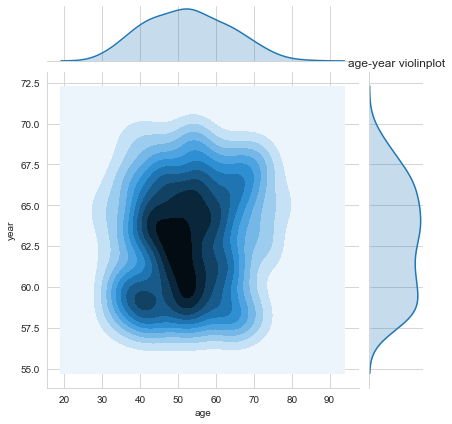

In [135]:
sns.jointplot(x='age',y='year',data=haberman,kind='kde')
plt.title("age-year violinplot")
plt.show()

#### most of the patients have undergone operation between the age of 40 to 60